In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/dataset/cats_and_dogs_small_2.h5")
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
____________________________

In [3]:
import zipfile

 
try:
    with zipfile.ZipFile("/content/drive/My Drive/dataset/train.zip") as zf:
        zf.extractall('./data')
        print("uncompress success")
 
except:
    print("uncompress fail")

uncompress success


In [0]:
img_path = './data/cat.1700.jpg'

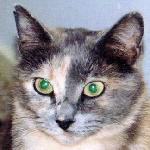

In [5]:
# 학습할 때 안 쓰였던 고양이 사진 하나 가져오자.
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150, 150)); img

In [6]:
img_tensor = image.img_to_array(img); print(img_tensor.shape, '\n', img_tensor)

(150, 150, 3) 
 [[[164. 174. 186.]
  [161. 171. 183.]
  [159. 171. 185.]
  ...
  [198. 214. 240.]
  [200. 216. 242.]
  [200. 216. 242.]]

 [[160. 170. 182.]
  [157. 167. 179.]
  [156. 168. 182.]
  ...
  [199. 215. 241.]
  [201. 217. 243.]
  [201. 217. 243.]]

 [[161. 171. 183.]
  [159. 169. 181.]
  [158. 170. 184.]
  ...
  [199. 215. 241.]
  [199. 215. 241.]
  [199. 215. 241.]]

 ...

 [[ 66.  50.  53.]
  [ 54.  37.  43.]
  [ 31.  16.  23.]
  ...
  [214. 192. 179.]
  [194. 177. 149.]
  [193. 176. 148.]]

 [[ 69.  50.  52.]
  [ 58.  42.  45.]
  [ 45.  28.  36.]
  ...
  [218. 199. 185.]
  [210. 192. 168.]
  [199. 181. 157.]]

 [[ 62.  44.  42.]
  [ 56.  38.  38.]
  [ 43.  26.  32.]
  ...
  [210. 193. 175.]
  [209. 193. 170.]
  [197. 181. 158.]]]


In [7]:
img_tensor = np.expand_dims(img_tensor, axis = 0) # axis 0에 하나 차원 더 만들어주나 봄
img_tensor /= 255.; print(img_tensor.shape, '\n', img_tensor)

(1, 150, 150, 3) 
 [[[[0.6431373  0.68235296 0.7294118 ]
   [0.6313726  0.67058825 0.7176471 ]
   [0.62352943 0.67058825 0.7254902 ]
   ...
   [0.7764706  0.8392157  0.9411765 ]
   [0.78431374 0.84705883 0.9490196 ]
   [0.78431374 0.84705883 0.9490196 ]]

  [[0.627451   0.6666667  0.7137255 ]
   [0.6156863  0.654902   0.7019608 ]
   [0.6117647  0.65882355 0.7137255 ]
   ...
   [0.78039217 0.84313726 0.94509804]
   [0.7882353  0.8509804  0.9529412 ]
   [0.7882353  0.8509804  0.9529412 ]]

  [[0.6313726  0.67058825 0.7176471 ]
   [0.62352943 0.6627451  0.70980394]
   [0.61960787 0.6666667  0.72156864]
   ...
   [0.78039217 0.84313726 0.94509804]
   [0.78039217 0.84313726 0.94509804]
   [0.78039217 0.84313726 0.94509804]]

  ...

  [[0.25882354 0.19607843 0.20784314]
   [0.21176471 0.14509805 0.16862746]
   [0.12156863 0.0627451  0.09019608]
   ...
   [0.8392157  0.7529412  0.7019608 ]
   [0.7607843  0.69411767 0.58431375]
   [0.75686276 0.6901961  0.5803922 ]]

  [[0.27058825 0.19607843 

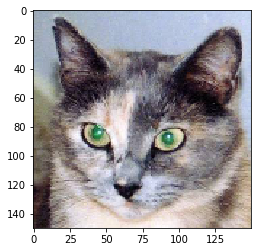

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [0]:
# 모든 층을 보여주는 모델을 만들 거임
from keras import models

# 상위 8개 출력
layer_outputs = [layer.output for layer in model.layers[:8]]

# 입력에 대해 8개층 출력 반환하는 모델 만듦

activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [10]:
layer_outputs

[<tf.Tensor 'conv2d_25/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_25/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_26/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_26/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_27/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_27/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_28/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_28/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [11]:
model.input # 제일 처음 들어가는 shape가 보임. 위는 이게 필터를 거치고 나오는 결과라 148

<tf.Tensor 'conv2d_25_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [0]:
# 이미지가 들어올 떄 이 모델은 원본 활성화 값을 반환함.
# 하나의 입력과 층의 활성화마다 8개씩 출력을 가짐
activations = activation_model.predict(img_tensor)

In [13]:
[i.shape for i in activations]

[(1, 148, 148, 32),
 (1, 74, 74, 32),
 (1, 72, 72, 64),
 (1, 36, 36, 64),
 (1, 34, 34, 128),
 (1, 17, 17, 128),
 (1, 15, 15, 128),
 (1, 7, 7, 128)]

In [14]:
first_layer_activation = activations[0] 
print(first_layer_activation.shape)

(1, 148, 148, 32)


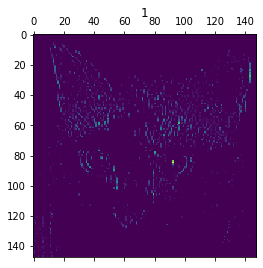

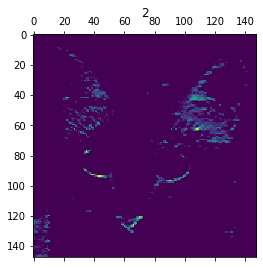

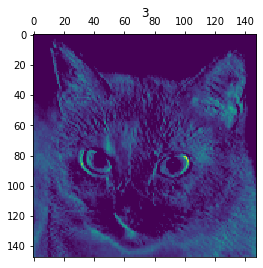

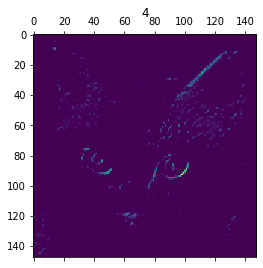

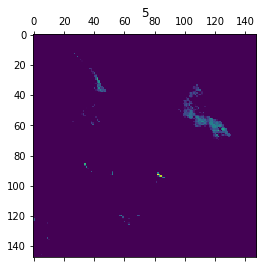

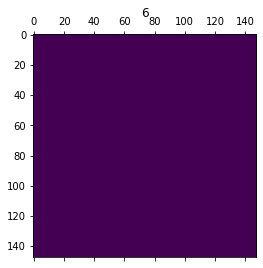

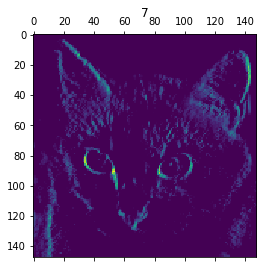

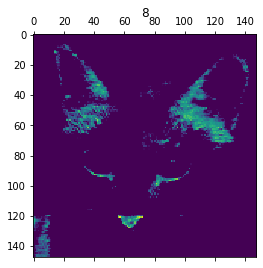

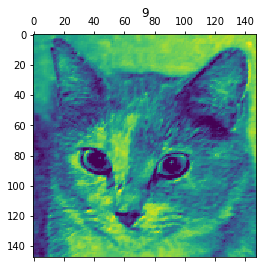

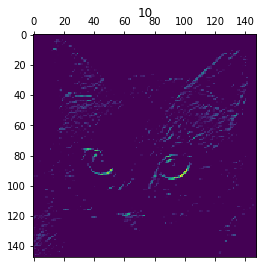

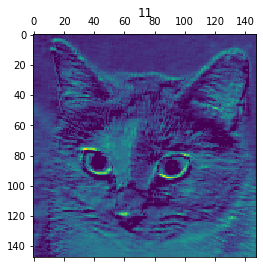

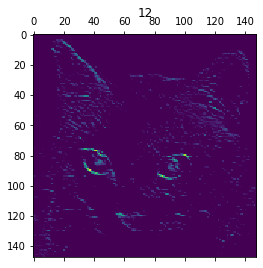

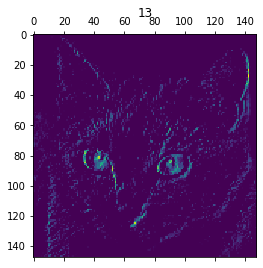

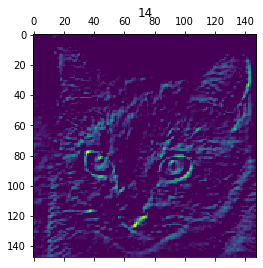

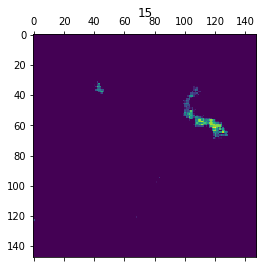

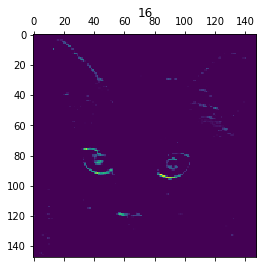

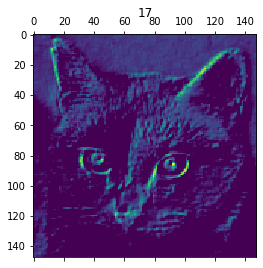

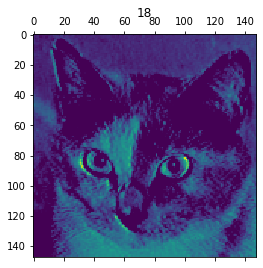

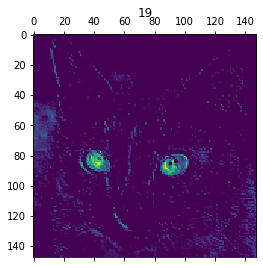

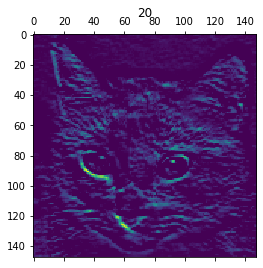

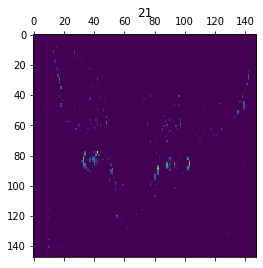

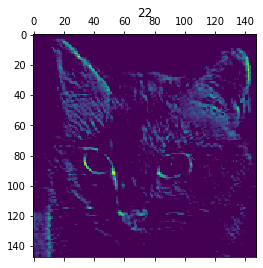

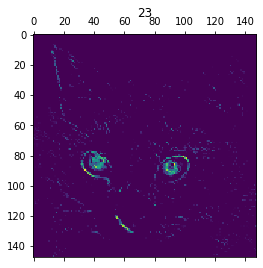

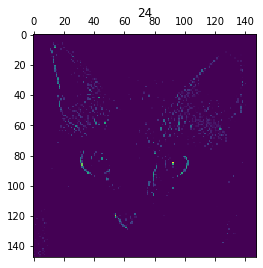

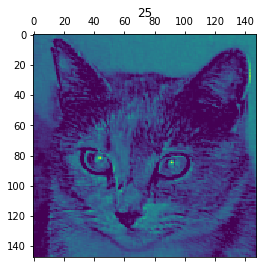

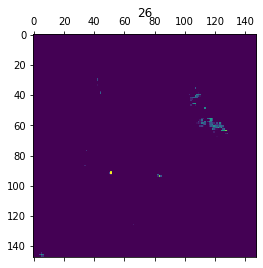

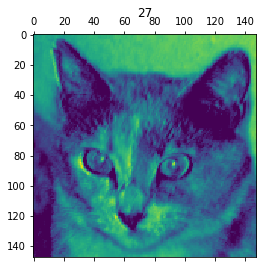

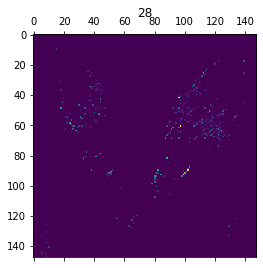

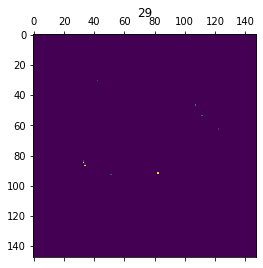

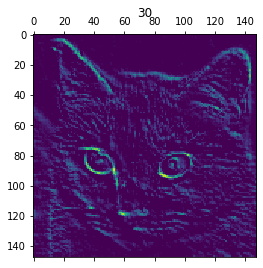

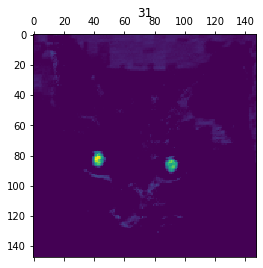

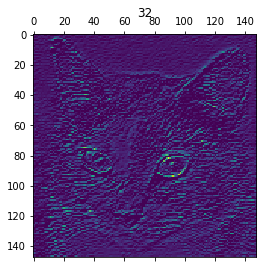

In [15]:
for i in range(32):
  plt.matshow(first_layer_activation[0, :, :, i], cmap = 'viridis')
  plt.title(i+1)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


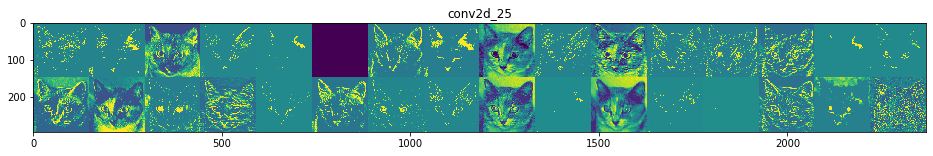

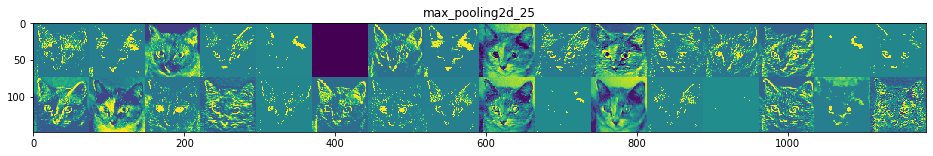

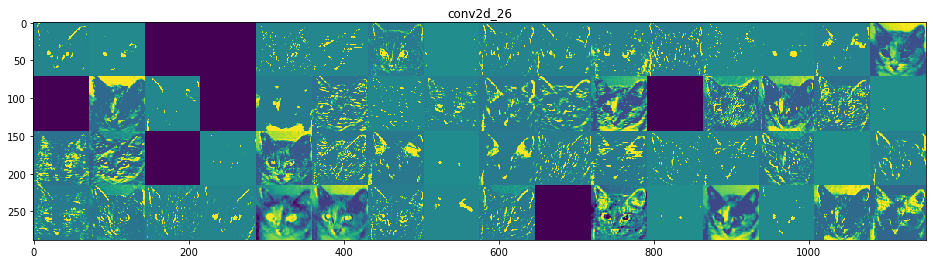

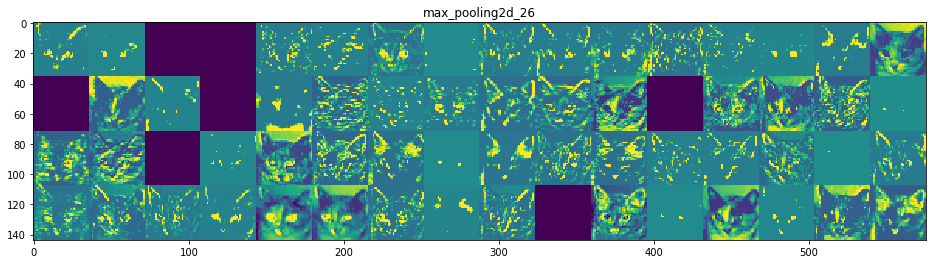

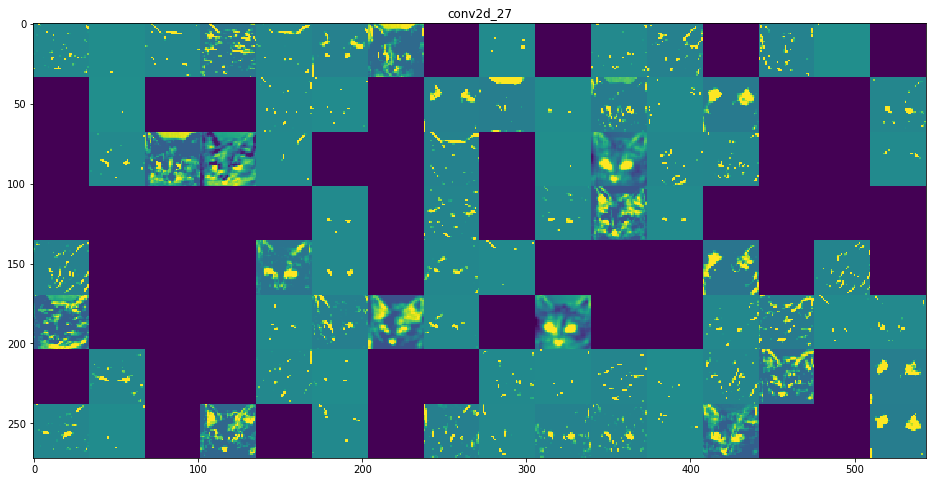

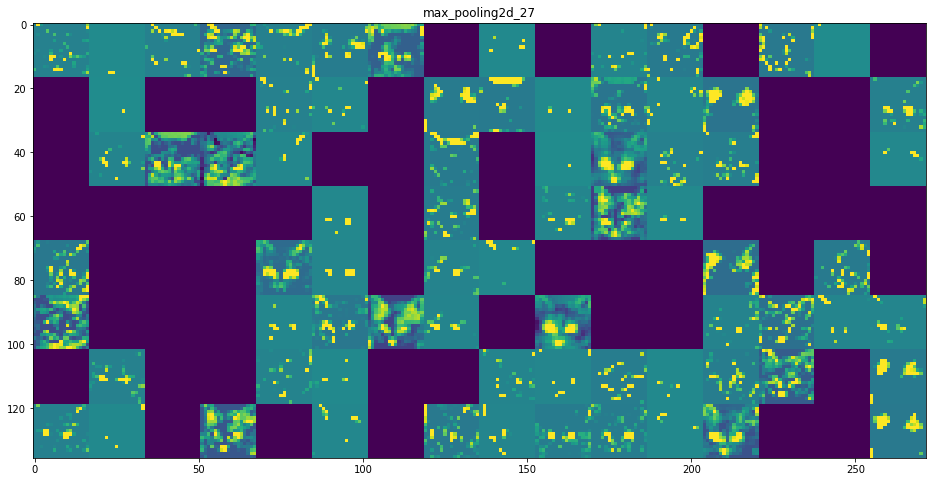

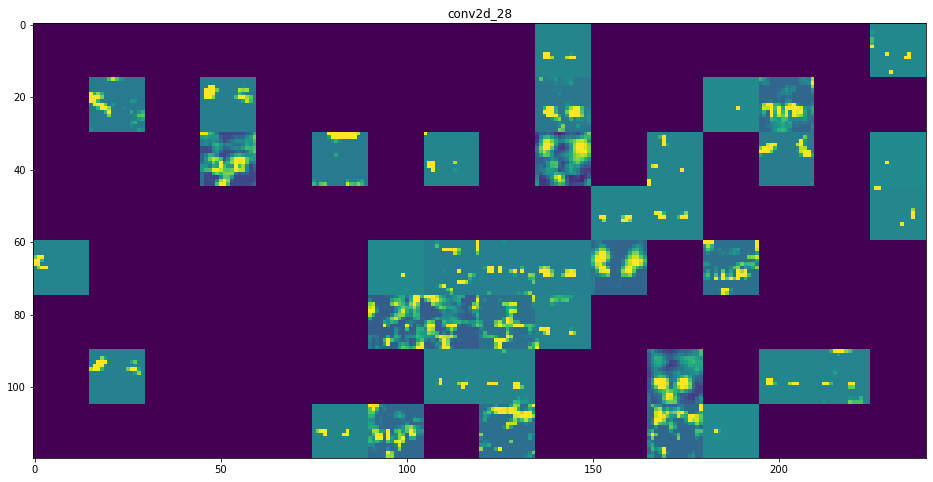

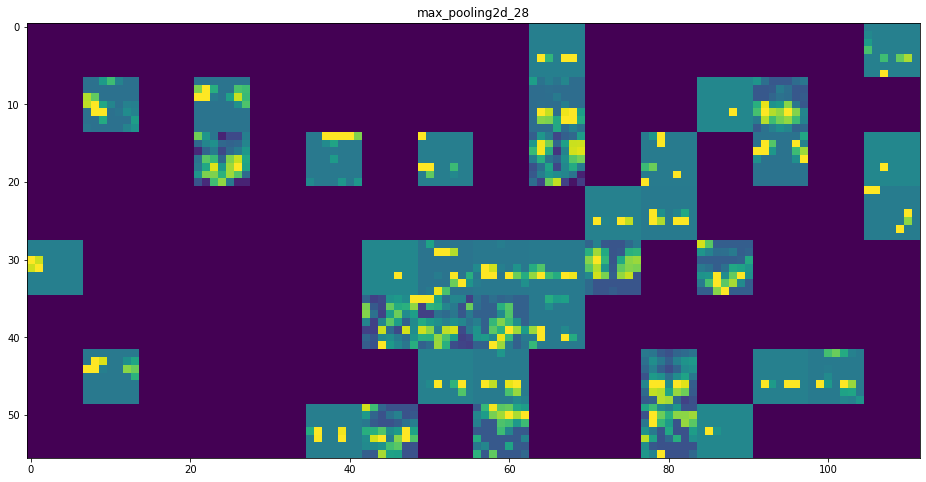

In [16]:
# 모든 네트워크를 시각화함
layer_names = []
for layer in model.layers[:8]:
  # 층 이름을 넣어줌
  layer_names.append(layer.name)

images_per_row = 16

# 이름과 6개 층이 zip으로 묶임
for layer_name, layer_activation in zip(layer_names, activations):
  # 필터 개수
  n_features = layer_activation.shape[-1]
  # 특성 맵 크기는 (1 * row * col * n_features)
  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row # 필터 개수를 16으로 나눔

  display_grid = np.zeros((size * n_cols, images_per_row * size))
  # 이러면 (rol * (필터 개수 // 16)), 16 * 16))

# row 개수
  for col in range(n_cols):
    # col 개수
    for row in range(images_per_row):

      # (x, 16개 배열로 출력함)
      channel_image = layer_activation[0, :, :, 
                                       col * images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      # 배열 최대, 최소값 설정해놓고 벗어나는 건 최대, 최소값으로 변경해주는 거
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image
      
      
  scale = 1. / size
  plt.figure(figsize = (scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
  
  plt.title(layer_name)
  plt.grid(False) # True해주면 그래프에 줄생김
  plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
plt.show()

In [17]:
layer_activation.shape

(1, 7, 7, 128)

In [0]:
a = layer_activation[0, :, :, 17]

In [19]:
a

array([[ 95.98224 ,  95.98224 , 139.5818  , 176.68982 , 114.83301 ,
         95.98224 ,  95.98224 ],
       [ 95.98224 ,  95.98224 ,  95.98224 ,  95.98224 ,  95.98224 ,
         95.98224 ,  95.98224 ],
       [226.91089 , 194.76985 ,  95.98224 ,  95.98224 ,  95.98224 ,
         95.98224 ,  95.98224 ],
       [230.30771 , 372.24036 , 153.07915 , 116.645515,  95.98224 ,
        112.562485, 110.09529 ],
       [ 95.98224 , 307.1958  , 348.2668  ,  95.98224 ,  99.969925,
        124.61074 , 113.83315 ],
       [ 95.98224 ,  95.98224 , 156.07863 ,  95.98224 ,  95.98224 ,
         95.98224 , 142.62862 ],
       [ 99.06188 ,  95.98224 ,  95.98224 ,  95.98224 ,  95.98224 ,
        114.884544, 130.25139 ]], dtype=float32)

In [20]:
(((layer_activation[0, :, :, 17] - a.mean()) // a.std()) * 64) + 128

array([[ 64.,  64., 128., 128.,  64.,  64.,  64.],
       [ 64.,  64.,  64.,  64.,  64.,  64.,  64.],
       [192., 192.,  64.,  64.,  64.,  64.,  64.],
       [192., 320., 128.,  64.,  64.,  64.,  64.],
       [ 64., 256., 320.,  64.,  64.,  64.,  64.],
       [ 64.,  64., 128.,  64.,  64.,  64., 128.],
       [ 64.,  64.,  64.,  64.,  64.,  64., 128.]], dtype=float32)

In [21]:
np.clip((((layer_activation[0, :, :, 17] - a.mean()) // a.std()) * 64) + 128, 0, 255).astype('uint8')

array([[ 64,  64, 128, 128,  64,  64,  64],
       [ 64,  64,  64,  64,  64,  64,  64],
       [192, 192,  64,  64,  64,  64,  64],
       [192, 255, 128,  64,  64,  64,  64],
       [ 64, 255, 255,  64,  64,  64,  64],
       [ 64,  64, 128,  64,  64,  64, 128],
       [ 64,  64,  64,  64,  64,  64, 128]], dtype=uint8)

In [0]:
# 첫 번재 층은 외각선을 따는듯
# 갈수록 사진의 고유 특성을 인코딩하는 것 같음
# 비어있는 층들이 많음, 필터에 입력된 패턴이 입력 이미지에 나타나지 않았다는 것을 의미함.

In [0]:
# 경사 상승법으로 선택된 필터가 최대로 응답하는 이미지 보기
# 1. 특정 합성곱 층의 한 필터값을 최대화하는 손실함수를 정의
# 2. 이 값을 최대화하기 위해 확률적 경사 상승법 도입(최소화하는 게 아님)

In [52]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights = 'imagenet',
              include_top = False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [25]:
layer_output

<tf.Tensor 'block3_conv1/Relu:0' shape=(?, ?, ?, 256) dtype=float32>

In [26]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [0]:
grads = K.gradients(loss, model.input)[0]

In [0]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# 그래디언트 텐서를 l2 노름 값으로 나눠주면 부드럽게 된다고 하는데, 입력 이미지에 적용할 수정량의 크기를
# 항상 일정하게 놓을 수 있다고 함(gradient clipping)

In [0]:
# 주어진 입력에 대해 손실 텐서와 그래디언트 텐서를 계산해야 함.
# iterate는 넘파이 텐서를 입력으로 받고 손실, 그래디언트. 2개의 넘파이 텐서를 반환함

In [0]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_val, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# 경사 상승법 구성
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128. # 128이 bias

step = 1.

# 경사 상승  40번 실행
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  # 손실, 그래디언트 계산

# 손실을 최대화하는 방향으로
  input_img_data += grads_value * step

In [32]:
1e-5 + 1

1.00001

In [0]:
# 결과 이미지는 (1, 150, 150, 3)
# 텐서값이 0, 255 사이가 아니라 또 변환해줘야 함
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x, 0, 1)

  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
# 준비 다 함.
def generate_pattern(layer_name, filter_index, size = 150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  grads = K.gradients(loss, model.input)[0]

  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])

  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

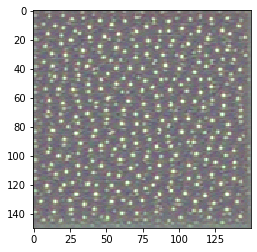

In [50]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [55]:
# 모든 필터를 시각화 고고

for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
  size = 64
  margin = 5

  results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

  for i in range(8):  # results 그리드의 행을 반복합니다
      for j in range(8):  # results 그리드의 열을 반복합니다
          # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
          filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

          # results 그리드의 (i, j) 번째 위치에 저장합니다
          horizontal_start = i * size + i * margin
          horizontal_end = horizontal_start + size
          vertical_start = j * size + j * margin
          vertical_end = vertical_start + size
          results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

  # results 그리드를 그립니다
  plt.figure(figsize=(20, 20))
  plt.imshow(results)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# 모델은 깊어질수록 복잡하게 됨
# 모델 첫 번째 층 필터는 간단한 것만 봄

## 클래스 활성화 히트맵 시각화

In [57]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet')

553467904/553467096 [==============================] - 13s 0us/step


In [0]:
# 코끼리 이미지를 넣을 건데 이 이미지는 224 * 224에서 훈련이 되었으니 우리도 바꿔줘야 함.

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/content/drive/My Drive/dataset/creative_commons_elephant.jpg'

# 244 244로 변환
img = image.load_img(img_path, target_size = (224, 224))
# 244 244 3으로 변환
x = image.img_to_array(img)
# 1 244 244 3으로 변환
x = np.expand_dims(x, axis = 0)
# 채널별 컬러 정규화
x = preprocess_input(x)

In [63]:
preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top = 3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted:  [('n02504458', 'African_elephant', 0.9094213), ('n01871265', 'tusker', 0.08618258), ('n02504013', 'Indian_elephant', 0.004354576)]


In [65]:
 decode_predictions(preds, top = 20) # 과거 이미지넷은 이런 식으로 분류가 많았는듯

[[('n02504458', 'African_elephant', 0.9094213),
  ('n01871265', 'tusker', 0.08618258),
  ('n02504013', 'Indian_elephant', 0.004354576),
  ('n02408429', 'water_buffalo', 3.994432e-05),
  ('n02397096', 'warthog', 1.3171793e-06),
  ('n01704323', 'triceratops', 9.073442e-08),
  ('n02410509', 'bison', 4.6989687e-08),
  ('n02403003', 'ox', 3.09519e-08),
  ('n02422106', 'hartebeest', 1.24482735e-08),
  ('n02437312', 'Arabian_camel', 1.188541e-08),
  ('n02391049', 'zebra', 6.5963146e-09),
  ('n02396427', 'wild_boar', 4.5477884e-09),
  ('n02454379', 'armadillo', 4.4972572e-09),
  ('n03868242', 'oxcart', 2.6536884e-09),
  ('n02398521', 'hippopotamus', 2.4424132e-09),
  ('n03967562', 'plow', 1.9405655e-09),
  ('n02412080', 'ram', 1.6779272e-09),
  ('n02395406', 'hog', 1.039227e-09),
  ('n02415577', 'bighorn', 9.208604e-10),
  ('n04613696', 'yurt', 4.993089e-10)]]

In [82]:
1.8547481e-12+1

1.0000000000018547

In [83]:
preds.shape # 2차원 모양이라 한 커풀 벗겨서 맥스 찍어야 함

(1, 1000)

In [86]:
np.argmax(preds[0])

386

In [85]:
preds[0][386]

0.9094213

In [88]:
# 예측 벡터의 아프리카 코끼리 항목
african_elephant_output = model.output[:, 386]; african_elephant_output

<tf.Tensor 'strided_slice_260:0' shape=(?,) dtype=float32>

In [89]:
# vgg16 마지막 합성곱인 block5_conv3 특성맵
last_conv_layer = model.get_layer('block5_conv3'); last_conv_layer

In [99]:
last_conv_layer.output

<tf.Tensor 'block5_conv3_1/Relu:0' shape=(?, 14, 14, 512) dtype=float32>

In [90]:
# block5_conv3 특성맵 출력에 대한 아프리카 코끼리 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]; grads

<tf.Tensor 'gradients_259/block5_pool_1/MaxPool_grad/MaxPoolGrad:0' shape=(?, 14, 14, 512) dtype=float32>

In [92]:
# 특성맵 채널별 그래디언트 평균값이 담긴 512 크기의 벡터
pooled_grads = K.mean(grads, axis = (0, 1, 2)); pooled_grads

<tf.Tensor 'Mean_518:0' shape=(512,) dtype=float32>

In [100]:
# 샘플 이미지가 주어졌을 때 pooled_grads, block5_conv3 특성맵 출력 구함
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]]); iterate

In [105]:
# 코끼리 샘플 넣고 두 개 넘파이 배열 얻음
pooled_grads_value, conv_layer_output_value = iterate([x])
pooled_grads_value

array([ 2.50613766e-06,  1.02688000e-06,  5.11051803e-06,  1.04617818e-07,
       -4.84066959e-06, -5.10034761e-06, -3.54321651e-06,  3.37465644e-06,
       -2.45812430e-06,  4.63811921e-06, -2.37370091e-06,  3.55483712e-06,
       -1.72745115e-06, -1.45916886e-07,  1.49656739e-06,  3.41376517e-06,
       -6.19286584e-06,  9.25984239e-07, -3.70164889e-06,  1.45482977e-06,
       -2.73841897e-06, -4.77557887e-06,  2.31103263e-06, -1.55209989e-06,
       -9.37537607e-07, -1.53429454e-07, -3.48902381e-06,  7.38196786e-06,
       -5.75341289e-07, -2.50462222e-06, -4.71830299e-06,  1.48247500e-06,
        5.59561659e-06, -1.44060050e-06,  7.54812481e-06, -5.79169273e-06,
        3.05263779e-06, -2.08396796e-06, -4.19115213e-06,  5.97502230e-06,
        3.07145491e-08, -5.34213632e-06,  3.58736436e-08,  8.67920335e-06,
       -4.33212881e-06,  9.59248268e-07,  5.98066072e-06, -2.05450169e-06,
       -4.87945090e-06, -3.17778881e-06, -3.66571498e-06,  1.55088117e-06,
        4.30127102e-06, -

In [106]:
conv_layer_output_value

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [0]:
# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
# 만든 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵
heatmap = np.mean(conv_layer_output_value, axis = -1)

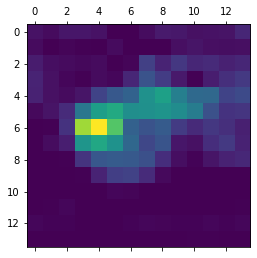

In [142]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [143]:
import cv2
img = cv2.imread(img_path) # 사본 로딩
img.shape

(600, 899, 3)

In [144]:
heatmap.shape

(14, 14)

In [145]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0])) # heatmap을 원본 이미지에 맞게 변경
heatmap.shape

(600, 899)

In [146]:
heatmap = np.uint8(255 * heatmap) # heatmap을 rgb 포맷으로 변환
heatmap.shape

(600, 899)

In [0]:
# 히트맵으로 변환
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [0]:
# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

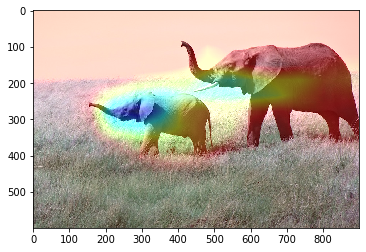

In [150]:
superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8') # 이렇게 변환해줘야 함
plt.imshow(superimposed_img)
plt.show()
# 귀로 코끼리의 종 구분을 하는 것 같음.
# 우측 코끼리는 안 봄